In [119]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd. set_option("display.max_columns", None)
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import defaultdict

from sklearn.metrics import classification_report, confusion_matrix  

## Binary classification

In [130]:
## Defining the required functions to perform the operations


kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")
def data_prepare(num1,num2):

    df_data2=df_data.iloc[:,:10]
    df_data2['label']=df_data['label']

    df=df_data2[(df_data['label']==num1)|(df_data['label']==num2)]
    label=df['label']
    df=df.drop('label',axis=1)
    return df,label  
def normal_data_prepare(num1,num2):
    df_data2=df_data.iloc[:,:25]
    df_data2['label']=df_data['label']

    df=df_data2[(df_data['label']==num1)|(df_data['label']==num2)]
    label=df['label']
    df=df.drop('label',axis=1)
    return df,label 
def data_modelling(num1,num2,c,kernel):
    df,label=normal_data_prepare(num1,num2)
    X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)# stratify to avoid class imbalancing
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    clf = SVC(kernel=kernel, C=c, random_state=42)
    scores = cross_val_score(clf, X_train,y_train,cv=5)
    return clf,scores
    

In [4]:
df_data=pd.read_csv('feat_25.csv')
df_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,label
0,2.635364,-0.304088,-1.543373,0.626779,-1.274464,2.004415,2.632512,-0.357011,0.922301,-0.476381,-0.679394,0.845453,-1.620134,1.271039,0.232265,-0.610930,-1.540198,0.394365,-1.250810,0.035356,-0.938941,-0.157161,-0.544130,1.417567,0.972746,0
1,1.296154,-0.721865,0.072174,0.792741,-1.086483,-0.612700,0.892532,-1.096112,-1.216686,1.014303,-2.064474,-0.759082,-0.656331,-1.070139,0.926862,-0.112256,0.642093,1.253564,-0.778490,-1.254446,0.130718,-0.330290,-0.617679,-0.219169,0.272224,0
2,1.525916,-0.600327,0.888153,-0.938027,-2.587087,-0.828671,-0.647110,-1.114573,0.438973,-1.142408,-0.253257,0.024593,0.232901,-1.213998,-1.542672,0.402928,-0.788130,-0.964493,3.330313,-0.890775,-0.751055,-0.944583,0.016899,0.093836,-0.204122,0
3,1.873367,-0.009268,1.933797,-0.494299,1.302262,-1.368107,0.876166,1.714779,-0.336721,0.127624,-0.159981,-1.202945,-1.578440,1.088574,1.495203,0.430647,-0.671202,0.584147,-1.498880,-0.130008,0.426312,0.000161,-0.658402,-0.704637,0.073824,0
4,1.876098,-0.611675,1.493026,-1.576377,-1.931573,-0.834816,-0.851659,-0.670840,0.740518,-1.304296,-0.559495,0.052864,-1.214895,-0.972922,-0.675875,-0.496011,0.453942,-0.641921,2.515081,-0.339636,-0.710988,-0.648390,0.857998,-0.653816,-0.006759,0


In [5]:
df_data.shape

(3000, 26)

## Checking for the classes 2 and 7 with first 10 features

In [93]:
df,label=data_prepare(2,7)

In [ ]:
#from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [13]:
label.shape

(600,)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)# stratify to avoid class imbalancing

## Study the efffects of hyperparameters using cross-validation.

In [131]:
from sklearn.model_selection import cross_val_score
def cross_validate(kern,c,gam):
    clf = SVC(kernel=kern, C=c, random_state=42,gamma=gam)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(scores)
    return np.mean(scores)

In [129]:
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for c in np.arange(0.01,20,.5):
        ans=cross_validate(kern,c,gam='scale')
        result_c[kern].append(ans)
        
    

[0.97619048 0.96428571 0.97619048 0.95238095 0.96428571]
[0.98809524 0.96428571 1.         0.97619048 0.98809524]
[0.98809524 0.96428571 1.         0.96428571 0.98809524]
[0.98809524 0.96428571 1.         0.95238095 0.98809524]
[0.98809524 0.95238095 1.         0.96428571 0.98809524]
[0.98809524 0.96428571 1.         0.97619048 0.97619048]
[0.98809524 0.96428571 0.98809524 0.98809524 0.97619048]
[0.98809524 0.97619048 0.98809524 0.98809524 0.97619048]
[1.         0.97619048 1.         0.98809524 0.98809524]
[1.         0.97619048 1.         0.98809524 0.98809524]
[1.         0.97619048 1.         0.98809524 0.98809524]
[1.         0.97619048 1.         0.98809524 0.98809524]
[1.         0.97619048 1.         0.98809524 0.98809524]
[0.98809524 0.97619048 1.         0.98809524 0.98809524]
[1.         0.97619048 1.         0.98809524 0.98809524]
[1.         0.97619048 1.         0.98809524 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.96428571 1.      

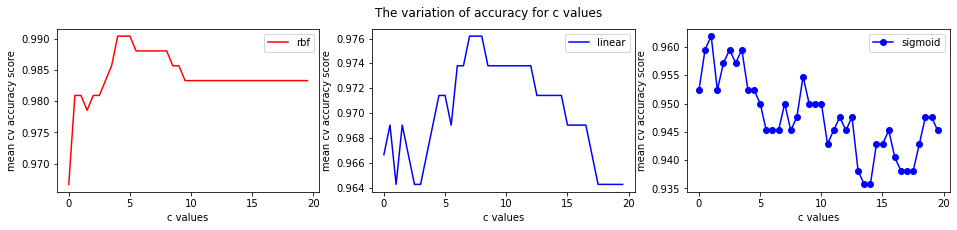

In [83]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for c values')
c_lst=np.arange(0.01,20,.5)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('c values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()

In [87]:
## now doing with respect to gamma values
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for gam in np.arange(0.001,1,.001):
        ans=cross_validate(kern,5.6,gam)
        result_c[kern].append(ans)
        
    

[0.97619048 0.94047619 0.98809524 0.97619048 0.96428571]
[0.97619048 0.94047619 0.98809524 0.97619048 0.98809524]
[0.97619048 0.96428571 0.97619048 0.97619048 0.97619048]
[0.97619048 0.95238095 0.97619048 0.96428571 0.97619048]
[0.97619048 0.95238095 0.97619048 0.96428571 0.97619048]
[0.96428571 0.95238095 0.98809524 0.96428571 0.98809524]
[0.96428571 0.95238095 0.98809524 0.96428571 0.98809524]
[0.96428571 0.95238095 0.98809524 0.95238095 0.98809524]
[0.96428571 0.95238095 0.98809524 0.95238095 0.98809524]
[0.96428571 0.95238095 0.98809524 0.95238095 0.98809524]
[0.96428571 0.95238095 0.98809524 0.96428571 0.98809524]
[0.96428571 0.95238095 0.98809524 0.96428571 0.97619048]
[0.96428571 0.95238095 0.98809524 0.96428571 0.97619048]
[0.96428571 0.95238095 0.98809524 0.96428571 0.97619048]
[0.97619048 0.95238095 0.98809524 0.96428571 0.97619048]
[0.97619048 0.95238095 0.98809524 0.96428571 0.97619048]
[0.97619048 0.95238095 0.98809524 0.96428571 0.97619048]
[0.97619048 0.95238095 0.988095

[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.         0.97619048 0.98809524]
[1.         0.97619048 1.      

[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.96428571 1.      

[0.97619048 0.96428571 0.98809524 0.96428571 0.97619048]
[0.97619048 0.96428571 0.98809524 0.96428571 0.97619048]
[0.97619048 0.96428571 0.98809524 0.96428571 0.97619048]
[0.97619048 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.98809524 0.96428571 0.97619048]
[0.96428571 0.96428571 0.988095

[0.96428571 0.95238095 0.98809524 0.96428571 0.96428571]
[0.96428571 0.95238095 0.98809524 0.96428571 0.96428571]
[0.96428571 0.95238095 0.98809524 0.96428571 0.96428571]
[0.96428571 0.95238095 0.98809524 0.96428571 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.98809524 0.95238095 0.96428571]
[0.96428571 0.95238095 0.988095

[0.96428571 0.94047619 0.98809524 0.94047619 0.95238095]
[0.96428571 0.94047619 0.98809524 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.97619048 0.94047619 0.95238095]
[0.96428571 0.94047619 0.976190

[0.96428571 0.92857143 0.95238095 0.91666667 0.92857143]
[0.96428571 0.92857143 0.95238095 0.91666667 0.92857143]
[0.96428571 0.92857143 0.95238095 0.91666667 0.92857143]
[0.96428571 0.92857143 0.95238095 0.91666667 0.92857143]
[0.96428571 0.92857143 0.95238095 0.91666667 0.92857143]
[0.96428571 0.92857143 0.95238095 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.94047619 0.91666667 0.92857143]
[0.96428571 0.92857143 0.940476

[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.964285

[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.964285

[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.964285

[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.964285

[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.964285

[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.964285

[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.96428571 0.95238095 0.96428571]
[0.97619048 0.98809524 0.964285

[0.94047619 0.97619048 0.97619048 0.96428571 0.96428571]
[0.92857143 0.97619048 0.97619048 0.96428571 0.96428571]
[0.92857143 0.95238095 0.97619048 0.95238095 0.96428571]
[0.94047619 0.96428571 0.97619048 0.96428571 0.96428571]
[0.94047619 0.95238095 0.97619048 0.96428571 0.96428571]
[0.94047619 0.95238095 0.97619048 0.95238095 0.96428571]
[0.92857143 0.96428571 0.97619048 0.95238095 0.96428571]
[0.92857143 0.95238095 0.97619048 0.95238095 0.97619048]
[0.92857143 0.96428571 0.97619048 0.95238095 0.96428571]
[0.92857143 0.96428571 0.96428571 0.95238095 0.96428571]
[0.92857143 0.96428571 0.97619048 0.95238095 0.96428571]
[0.92857143 0.96428571 0.97619048 0.95238095 0.97619048]
[0.92857143 0.95238095 0.97619048 0.94047619 0.97619048]
[0.95238095 0.96428571 0.97619048 0.94047619 0.97619048]
[0.94047619 0.96428571 0.95238095 0.94047619 0.97619048]
[0.94047619 0.96428571 0.94047619 0.95238095 0.96428571]
[0.94047619 0.95238095 0.94047619 0.96428571 0.96428571]
[0.94047619 0.96428571 0.952380

[0.9047619  0.94047619 0.91666667 0.9047619  0.88095238]
[0.92857143 0.94047619 0.91666667 0.9047619  0.92857143]
[0.92857143 0.94047619 0.92857143 0.91666667 0.89285714]
[0.92857143 0.92857143 0.91666667 0.91666667 0.89285714]
[0.86904762 0.92857143 0.92857143 0.91666667 0.89285714]
[0.86904762 0.92857143 0.92857143 0.91666667 0.88095238]
[0.86904762 0.94047619 0.92857143 0.91666667 0.94047619]
[0.92857143 0.92857143 0.92857143 0.95238095 0.94047619]
[0.89285714 0.91666667 0.92857143 0.94047619 0.89285714]
[0.89285714 0.91666667 0.91666667 0.94047619 0.89285714]
[0.85714286 0.91666667 0.91666667 0.92857143 0.94047619]
[0.88095238 0.91666667 0.92857143 0.92857143 0.86904762]
[0.88095238 0.92857143 0.92857143 0.92857143 0.86904762]
[0.88095238 0.92857143 0.92857143 0.94047619 0.86904762]
[0.92857143 0.92857143 0.92857143 0.94047619 0.86904762]
[0.92857143 0.92857143 0.92857143 0.94047619 0.86904762]
[0.92857143 0.92857143 0.92857143 0.94047619 0.86904762]
[0.92857143 0.92857143 0.928571

[0.88095238 0.9047619  0.88095238 0.88095238 0.85714286]
[0.88095238 0.9047619  0.88095238 0.88095238 0.85714286]
[0.88095238 0.9047619  0.88095238 0.88095238 0.85714286]
[0.88095238 0.9047619  0.86904762 0.88095238 0.85714286]
[0.88095238 0.9047619  0.86904762 0.9047619  0.85714286]
[0.88095238 0.9047619  0.85714286 0.9047619  0.85714286]
[0.88095238 0.9047619  0.86904762 0.9047619  0.85714286]
[0.88095238 0.9047619  0.85714286 0.92857143 0.85714286]
[0.88095238 0.9047619  0.85714286 0.92857143 0.85714286]
[0.88095238 0.9047619  0.85714286 0.94047619 0.86904762]
[0.88095238 0.9047619  0.85714286 0.94047619 0.86904762]
[0.88095238 0.9047619  0.89285714 0.94047619 0.83333333]
[0.88095238 0.9047619  0.89285714 0.94047619 0.83333333]
[0.88095238 0.9047619  0.89285714 0.89285714 0.83333333]
[0.88095238 0.9047619  0.89285714 0.89285714 0.83333333]
[0.88095238 0.9047619  0.89285714 0.89285714 0.83333333]
[0.88095238 0.9047619  0.88095238 0.89285714 0.83333333]
[0.88095238 0.9047619  0.880952

[0.8452381  0.9047619  0.8452381  0.88095238 0.82142857]
[0.8452381  0.89285714 0.8452381  0.88095238 0.82142857]
[0.8452381  0.89285714 0.8452381  0.88095238 0.82142857]
[0.8452381  0.89285714 0.8452381  0.88095238 0.82142857]
[0.8452381  0.89285714 0.8452381  0.88095238 0.82142857]
[0.8452381  0.89285714 0.85714286 0.88095238 0.82142857]
[0.8452381  0.89285714 0.85714286 0.8452381  0.82142857]
[0.8452381  0.89285714 0.85714286 0.88095238 0.82142857]
[0.8452381  0.9047619  0.85714286 0.88095238 0.82142857]
[0.8452381  0.9047619  0.85714286 0.88095238 0.82142857]
[0.8452381  0.9047619  0.85714286 0.88095238 0.82142857]
[0.86904762 0.9047619  0.85714286 0.88095238 0.83333333]
[0.86904762 0.89285714 0.85714286 0.88095238 0.83333333]
[0.86904762 0.89285714 0.85714286 0.88095238 0.83333333]
[0.8452381  0.89285714 0.85714286 0.86904762 0.83333333]
[0.8452381  0.89285714 0.85714286 0.86904762 0.8452381 ]
[0.8452381  0.89285714 0.85714286 0.86904762 0.8452381 ]
[0.8452381  0.89285714 0.857142

[0.80952381 0.89285714 0.8452381  0.88095238 0.8452381 ]
[0.80952381 0.89285714 0.8452381  0.88095238 0.85714286]
[0.86904762 0.89285714 0.8452381  0.88095238 0.8452381 ]
[0.86904762 0.89285714 0.8452381  0.88095238 0.85714286]
[0.88095238 0.89285714 0.8452381  0.88095238 0.8452381 ]
[0.88095238 0.89285714 0.8452381  0.88095238 0.85714286]
[0.86904762 0.89285714 0.8452381  0.88095238 0.8452381 ]
[0.86904762 0.89285714 0.8452381  0.88095238 0.85714286]
[0.86904762 0.89285714 0.8452381  0.86904762 0.85714286]
[0.86904762 0.89285714 0.8452381  0.86904762 0.8452381 ]
[0.86904762 0.89285714 0.8452381  0.86904762 0.85714286]
[0.86904762 0.88095238 0.8452381  0.86904762 0.8452381 ]
[0.86904762 0.88095238 0.8452381  0.88095238 0.8452381 ]
[0.86904762 0.88095238 0.8452381  0.88095238 0.8452381 ]
[0.86904762 0.88095238 0.8452381  0.88095238 0.85714286]
[0.86904762 0.86904762 0.8452381  0.88095238 0.85714286]
[0.85714286 0.86904762 0.8452381  0.88095238 0.8452381 ]
[0.85714286 0.86904762 0.845238

[0.82142857 0.85714286 0.8452381  0.88095238 0.8452381 ]
[0.82142857 0.85714286 0.86904762 0.88095238 0.8452381 ]
[0.82142857 0.85714286 0.86904762 0.88095238 0.8452381 ]
[0.82142857 0.8452381  0.86904762 0.88095238 0.8452381 ]
[0.82142857 0.8452381  0.86904762 0.88095238 0.8452381 ]
[0.82142857 0.8452381  0.86904762 0.88095238 0.8452381 ]
[0.82142857 0.8452381  0.86904762 0.88095238 0.8452381 ]
[0.82142857 0.8452381  0.86904762 0.88095238 0.8452381 ]
[0.82142857 0.8452381  0.86904762 0.88095238 0.8452381 ]
[0.82142857 0.8452381  0.86904762 0.88095238 0.8452381 ]
[0.82142857 0.8452381  0.86904762 0.85714286 0.8452381 ]
[0.82142857 0.8452381  0.86904762 0.85714286 0.8452381 ]
[0.82142857 0.8452381  0.85714286 0.85714286 0.8452381 ]
[0.82142857 0.8452381  0.8452381  0.85714286 0.8452381 ]
[0.82142857 0.86904762 0.8452381  0.85714286 0.89285714]
[0.82142857 0.86904762 0.8452381  0.85714286 0.85714286]
[0.82142857 0.86904762 0.8452381  0.86904762 0.85714286]
[0.82142857 0.86904762 0.845238

[0.82142857 0.82142857 0.8452381  0.8452381  0.8452381 ]
[0.82142857 0.82142857 0.8452381  0.8452381  0.8452381 ]
[0.82142857 0.89285714 0.8452381  0.86904762 0.8452381 ]
[0.82142857 0.89285714 0.8452381  0.8452381  0.80952381]
[0.82142857 0.82142857 0.8452381  0.85714286 0.8452381 ]
[0.82142857 0.82142857 0.8452381  0.8452381  0.8452381 ]
[0.83333333 0.82142857 0.8452381  0.8452381  0.80952381]
[0.82142857 0.82142857 0.8452381  0.8452381  0.8452381 ]
[0.83333333 0.82142857 0.8452381  0.85714286 0.80952381]
[0.83333333 0.82142857 0.8452381  0.8452381  0.80952381]
[0.82142857 0.82142857 0.8452381  0.86904762 0.80952381]
[0.82142857 0.82142857 0.8452381  0.85714286 0.80952381]
[0.83333333 0.82142857 0.8452381  0.8452381  0.80952381]
[0.82142857 0.85714286 0.8452381  0.85714286 0.80952381]
[0.82142857 0.89285714 0.8452381  0.85714286 0.80952381]
[0.83333333 0.89285714 0.8452381  0.8452381  0.80952381]
[0.82142857 0.89285714 0.8452381  0.86904762 0.80952381]


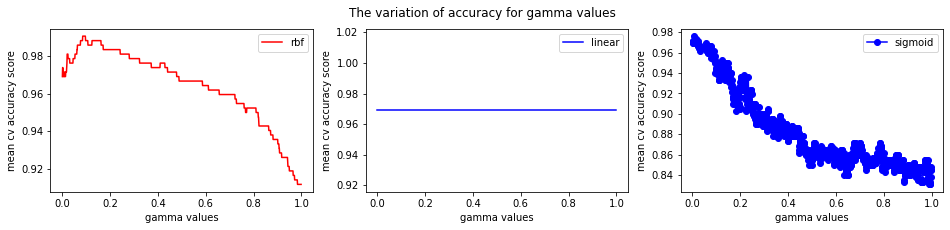

In [89]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for gamma values')
c_lst=np.arange(0.001,1,0.001)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('gamma values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()

In [130]:
np.max(result_c['rbf'])

0.9904761904761905

In [95]:
best_params=defaultdict(lambda : 'not present')

In [96]:
## studying the effect of different kernels and other hyperparameters
import random
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,11,12,10,20,30,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
parameters = [ {'C':[.1,0.01,10,20,30,40], 'kernel':['rbf','linear','poly'], 'degree': [2,3,4] ,'gamma':[10*random.random() for num in range(5)]} ]
grid = GridSearchCV(SVC(),param_grid,refit=parameters,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(grid_predictions)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
best_params['p27']=grid.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    1.0s finished


#Can you distinguish cases of overfitting,underfitting here? and Study the effects of chaning the hyperparameters

In [97]:
dict(best_params)

{'p27': {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}}

In [98]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[88  2]
 [ 2 88]]
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        90
           7       0.98      0.98      0.98        90

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



In [ ]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

# Linear kernel

In [74]:
# Feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Train the model; We will train different models using different value of C
svm = SVC(kernel= 'linear', random_state=1, C=0.051,gamma='scale')
svm.fit(X_train_std, y_train)
 
# Measure accuracy score
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.983


# Sigmoid kernel

In [77]:
# Feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Train the model; We will train different models using different value of C
svm = SVC(kernel= 'sigmoid', random_state=1, C=0.021,gamma='scale')
svm.fit(X_train_std, y_train)
 
# Measure accuracy score
y_pred = svm.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.972


##Rbf kernel

In [61]:
# Feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
# Train the model; We will train different models using different value of C
svm = SVC(kernel= 'rbf', random_state=1, C=0.051,gamma='scale')
svm.fit(X_train_std, y_train)
 
# Measure accuracy score
y_pred = svm.predict(X_test_std)
#('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('Training set score: {:.4f}'.format(svm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm.score(X_test, y_test)))
#The smaller the value of C, the wider the margins – which may lead to more misclassifications.
##Inversely, the larger the value of C, the more narrow the margins of the classifier become – this may lead to fewer misclassifications
# but higher values of c leads to overfitting

Training set score: 0.9714
Test set score: 0.9778


## Checking the classes 2 and 7 with full features

In [13]:
def data_modelling(num1,num2,c,kernel):
    df,label=normal_data_prepare(num1,num2)
    X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)# strat
    ify to avoid class imbalancing
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    model=SVC(kernel= 'linear', random_state=1, C=0.051,gamma='scale')
    model.fit(X_train_std,y_train)
    #clf = SVC(kernel=kernel, C=c, random_state=42)
    #scores = cross_val_score(clf, X_train,y_train,cv=5)
    y_pred = model.predict(X_test_std)
    return model,scores,y_pred



SyntaxError: invalid syntax (Temp/ipykernel_6432/2775089939.py, line 4)

In [99]:
df,label=normal_data_prepare(2,7)
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)


In [123]:
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for c in np.arange(0.01,20,.5):
        ans=cross_validate(kern,c,gam='scale')
        result_c[kern].append(ans)
        

[0.97619048 0.98809524 0.92857143 0.94047619 0.95238095]
[1.         0.96428571 1.         0.96428571 0.97619048]
[0.98809524 0.97619048 1.         0.97619048 0.97619048]
[0.98809524 0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.      

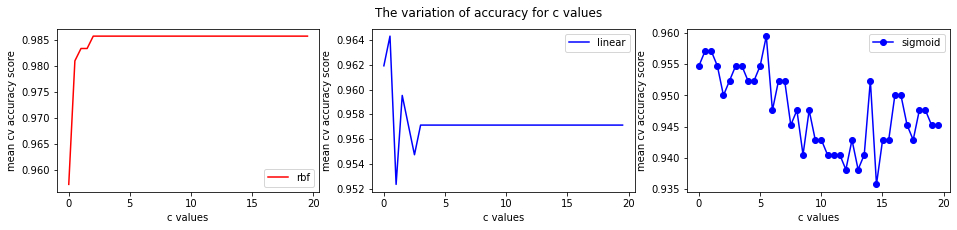

In [104]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for c values')
c_lst=np.arange(0.01,20,.5)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('c values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()

In [124]:
np.max(result_c['rbf'])

0.9857142857142858

In [97]:
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for gam in np.arange(0.001,1,.001):
        ans=cross_validate(kern,5.6,gam)
        result_c[kern].append(ans)

[0.98809524 0.96428571 0.95238095 0.96428571 0.95238095]
[0.98809524 0.96428571 0.97619048 0.96428571 0.96428571]
[0.98809524 0.97619048 0.97619048 0.97619048 0.96428571]
[0.98809524 0.97619048 0.97619048 0.97619048 0.97619048]
[0.98809524 0.97619048 0.97619048 0.97619048 0.98809524]
[0.98809524 0.97619048 0.98809524 0.97619048 1.        ]
[0.98809524 0.97619048 0.98809524 0.97619048 1.        ]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.98809524 0.97619048 0.96428571]
[0.98809524 0.97619048 0.98809524 0.97619048 0.96428571]
[0.98809524 0.97619048 0.97619048 0.97619048 0.96428571]
[0.98809524 0.97619048 0.98809524 0.97619048 0.96428571]
[0.98809524 0.97619048 0.98809524 0.97619048 0.96428571]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.988095

[0.95238095 0.92857143 0.95238095 0.96428571 0.94047619]
[0.95238095 0.92857143 0.95238095 0.96428571 0.94047619]
[0.95238095 0.92857143 0.95238095 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.91666667 0.96428571 0.94047619]
[0.95238095 0.91666667 0.916666

[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.86904762]
[0.89285714 0.86904762 0.86904762 0.8452381  0.85714286]
[0.89285714 0.86904762 0.86904762 0.8452381  0.85714286]
[0.89285714 0.86904762 0.86904762 0.8452381  0.85714286]
[0.89285714 0.86904762 0.86904762 0.83333333 0.85714286]
[0.89285714 0.86904762 0.86904762 0.83333333 0.85714286]
[0.89285714 0.86904762 0.86904762 0.83333333 0.85714286]
[0.89285714 0.86904762 0.86904762 0.83333333 0.85714286]
[0.89285714 0.86904762 0.86904762 0.83333333 0.8452381 ]
[0.89285714 0.86904762 0.869047

[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.78571429 0.79761905]
[0.85714286 0.83333333 0.82142857 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.809523

[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.73809524]
[0.78571429 0.78571429 0.76190476 0.71428571 0.73809524]
[0.78571429 0.78571429 0.76190476 0.71428571 0.73809524]
[0.78571429 0.78571429 0.76190476 0.71428571 0.73809524]
[0.78571429 0.78571429 0.761904

[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.67857143]
[0.76190476 0.77380952 0.69047619 0.67857143 0.67857143]
[0.76190476 0.77380952 0.69047619 0.67857143 0.67857143]
[0.76190476 0.77380952 0.69047619 0.67857143 0.67857143]
[0.76190476 0.77380952 0.69047619 0.67857143 0.67857143]
[0.76190476 0.77380952 0.69047619 0.67857143 0.67857143]
[0.76190476 0.77380952 0.690476

[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.654761

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.9047619  0.9047619  0.88095238 0.85714286 0.94047619]
[0.89285714 0.86904762 0.88095238 0.86904762 0.94047619]
[0.89285714 0.91666667 0.88095238 0.86904762 0.92857143]
[0.9047619  0.92857143 0.86904762 0.85714286 0.91666667]
[0.9047619  0.88095238 0.88095238 0.8452381  0.91666667]
[0.9047619  0.89285714 0.88095238 0.85714286 0.91666667]
[0.9047619  0.85714286 0.88095238 0.8452381  0.9047619 ]
[0.91666667 0.83333333 0.85714286 0.85714286 0.91666667]
[0.9047619  0.86904762 0.85714286 0.9047619  0.9047619 ]
[0.89285714 0.88095238 0.88095238 0.9047619  0.91666667]
[0.89285714 0.86904762 0.89285714 0.89285714 0.91666667]
[0.9047619  0.86904762 0.89285714 0.89285714 0.9047619 ]
[0.89285714 0.86904762 0.88095238 0.85714286 0.91666667]
[0.91666667 0.86904762 0.88095238 0.86904762 0.9047619 ]
[0.9047619  0.86904762 0.86904762 0.83333333 0.9047619 ]
[0.9047619  0.88095238 0.89285714 0.86904762 0.9047619 ]
[0.9047619  0.88095238 0.86904762 0.85714286 0.92857143]
[0.89285714 0.88095238 0.880952

[0.78571429 0.79761905 0.71428571 0.82142857 0.82142857]
[0.78571429 0.79761905 0.71428571 0.82142857 0.82142857]
[0.78571429 0.79761905 0.73809524 0.82142857 0.82142857]
[0.79761905 0.79761905 0.75       0.82142857 0.82142857]
[0.78571429 0.82142857 0.75       0.79761905 0.82142857]
[0.77380952 0.80952381 0.75       0.78571429 0.82142857]
[0.77380952 0.78571429 0.75       0.78571429 0.83333333]
[0.77380952 0.78571429 0.75       0.78571429 0.83333333]
[0.77380952 0.80952381 0.73809524 0.78571429 0.83333333]
[0.78571429 0.79761905 0.75       0.80952381 0.83333333]
[0.78571429 0.80952381 0.73809524 0.79761905 0.83333333]
[0.78571429 0.79761905 0.75       0.78571429 0.83333333]
[0.78571429 0.79761905 0.75       0.78571429 0.83333333]
[0.78571429 0.79761905 0.75       0.78571429 0.82142857]
[0.78571429 0.79761905 0.75       0.77380952 0.82142857]
[0.78571429 0.79761905 0.75       0.80952381 0.82142857]
[0.78571429 0.79761905 0.75       0.9047619  0.82142857]
[0.78571429 0.80952381 0.75    

[0.75       0.78571429 0.71428571 0.76190476 0.8452381 ]
[0.75       0.78571429 0.71428571 0.76190476 0.8452381 ]
[0.75       0.78571429 0.70238095 0.76190476 0.8452381 ]
[0.75       0.79761905 0.70238095 0.75       0.8452381 ]
[0.77380952 0.79761905 0.70238095 0.75       0.8452381 ]
[0.77380952 0.79761905 0.69047619 0.75       0.82142857]
[0.77380952 0.79761905 0.70238095 0.75       0.82142857]
[0.77380952 0.80952381 0.69047619 0.75       0.83333333]
[0.77380952 0.80952381 0.69047619 0.75       0.8452381 ]
[0.77380952 0.78571429 0.69047619 0.75       0.83333333]
[0.76190476 0.79761905 0.70238095 0.75       0.83333333]
[0.76190476 0.79761905 0.70238095 0.75       0.83333333]
[0.77380952 0.79761905 0.71428571 0.75       0.83333333]
[0.77380952 0.79761905 0.70238095 0.75       0.83333333]
[0.77380952 0.80952381 0.69047619 0.75       0.83333333]
[0.77380952 0.79761905 0.69047619 0.77380952 0.83333333]
[0.77380952 0.73809524 0.69047619 0.75       0.83333333]
[0.77380952 0.73809524 0.690476

[0.72619048 0.77380952 0.67857143 0.76190476 0.83333333]
[0.72619048 0.77380952 0.66666667 0.76190476 0.83333333]
[0.72619048 0.77380952 0.66666667 0.76190476 0.8452381 ]
[0.72619048 0.77380952 0.66666667 0.76190476 0.8452381 ]
[0.72619048 0.77380952 0.66666667 0.76190476 0.82142857]
[0.72619048 0.77380952 0.69047619 0.76190476 0.83333333]
[0.72619048 0.77380952 0.69047619 0.76190476 0.82142857]
[0.72619048 0.76190476 0.69047619 0.76190476 0.82142857]
[0.72619048 0.76190476 0.69047619 0.76190476 0.79761905]
[0.72619048 0.76190476 0.69047619 0.76190476 0.83333333]
[0.72619048 0.78571429 0.67857143 0.76190476 0.82142857]
[0.77380952 0.77380952 0.67857143 0.77380952 0.82142857]
[0.77380952 0.77380952 0.67857143 0.77380952 0.83333333]
[0.77380952 0.77380952 0.67857143 0.77380952 0.82142857]
[0.75       0.75       0.66666667 0.77380952 0.82142857]
[0.75       0.75       0.69047619 0.76190476 0.82142857]
[0.75       0.75       0.69047619 0.77380952 0.82142857]
[0.73809524 0.73809524 0.690476

[0.76190476 0.75       0.66666667 0.76190476 0.80952381]
[0.75       0.79761905 0.66666667 0.76190476 0.80952381]
[0.75       0.75       0.66666667 0.77380952 0.80952381]
[0.75       0.75       0.66666667 0.77380952 0.80952381]
[0.75       0.75       0.70238095 0.76190476 0.80952381]
[0.73809524 0.75       0.70238095 0.76190476 0.83333333]
[0.73809524 0.79761905 0.70238095 0.76190476 0.83333333]
[0.73809524 0.79761905 0.6547619  0.76190476 0.83333333]
[0.75       0.79761905 0.6547619  0.76190476 0.80952381]
[0.75       0.79761905 0.6547619  0.76190476 0.80952381]
[0.73809524 0.79761905 0.66666667 0.76190476 0.80952381]
[0.75       0.79761905 0.6547619  0.76190476 0.80952381]
[0.73809524 0.79761905 0.6547619  0.76190476 0.80952381]
[0.73809524 0.79761905 0.67857143 0.76190476 0.80952381]
[0.73809524 0.79761905 0.67857143 0.76190476 0.80952381]
[0.73809524 0.79761905 0.67857143 0.76190476 0.80952381]
[0.72619048 0.79761905 0.67857143 0.76190476 0.80952381]
[0.72619048 0.79761905 0.678571

[0.76190476 0.78571429 0.66666667 0.72619048 0.80952381]
[0.76190476 0.75       0.6547619  0.72619048 0.80952381]
[0.76190476 0.77380952 0.6547619  0.73809524 0.80952381]
[0.76190476 0.77380952 0.6547619  0.73809524 0.80952381]
[0.76190476 0.77380952 0.6547619  0.72619048 0.79761905]
[0.76190476 0.77380952 0.6547619  0.72619048 0.79761905]
[0.76190476 0.77380952 0.6547619  0.72619048 0.79761905]
[0.76190476 0.75       0.6547619  0.73809524 0.79761905]
[0.76190476 0.77380952 0.6547619  0.73809524 0.79761905]
[0.76190476 0.77380952 0.6547619  0.76190476 0.79761905]
[0.76190476 0.77380952 0.6547619  0.76190476 0.80952381]
[0.76190476 0.77380952 0.6547619  0.76190476 0.80952381]
[0.76190476 0.77380952 0.6547619  0.76190476 0.80952381]
[0.76190476 0.78571429 0.6547619  0.76190476 0.80952381]
[0.76190476 0.78571429 0.6547619  0.76190476 0.80952381]
[0.76190476 0.77380952 0.6547619  0.75       0.80952381]
[0.76190476 0.77380952 0.6547619  0.75       0.80952381]
[0.76190476 0.77380952 0.666666

[0.76190476 0.79761905 0.6547619  0.73809524 0.79761905]
[0.76190476 0.79761905 0.6547619  0.72619048 0.80952381]
[0.76190476 0.79761905 0.6547619  0.75       0.80952381]
[0.76190476 0.79761905 0.6547619  0.75       0.80952381]
[0.76190476 0.73809524 0.67857143 0.75       0.80952381]
[0.76190476 0.73809524 0.67857143 0.75       0.80952381]
[0.76190476 0.73809524 0.67857143 0.75       0.80952381]
[0.76190476 0.73809524 0.67857143 0.75       0.82142857]
[0.76190476 0.79761905 0.69047619 0.75       0.82142857]
[0.76190476 0.79761905 0.69047619 0.75       0.82142857]
[0.76190476 0.79761905 0.69047619 0.75       0.79761905]
[0.76190476 0.79761905 0.69047619 0.75       0.79761905]
[0.76190476 0.79761905 0.6547619  0.75       0.79761905]
[0.76190476 0.78571429 0.6547619  0.75       0.79761905]
[0.76190476 0.78571429 0.6547619  0.75       0.79761905]
[0.76190476 0.78571429 0.6547619  0.72619048 0.79761905]
[0.76190476 0.78571429 0.6547619  0.72619048 0.82142857]
[0.76190476 0.78571429 0.654761

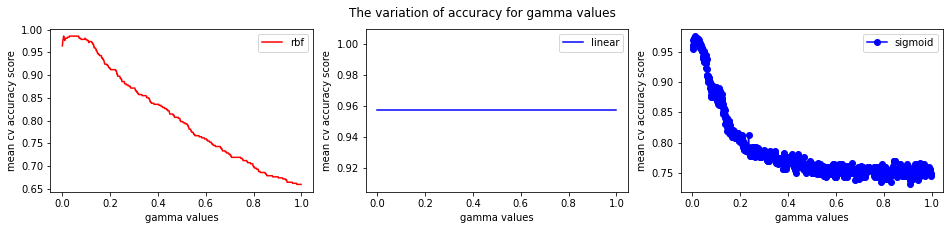

In [98]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for gamma values')
c_lst=np.arange(0.001,1,0.001)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('gamma values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()

In [43]:
model,scores,y_pred=data_modelling(1,2,3,'linear')

In [44]:
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for c in np.arange(0.01,20,.5):
        ans=cross_validate(kern,c)
        result_c[kern].append(ans)
        

SVC(C=0.051, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print('Training set score: {:.4f}'.format(svm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm.score(X_test, y_test)))

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0  0  0]
 [90  0  0]
 [ 1 89  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00      90.0
           7       0.00      0.00      0.00      90.0

    accuracy                           0.00     180.0
   macro avg       0.00      0.00      0.00     180.0
weighted avg       0.00      0.00      0.00     180.0



In [100]:
import random
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,11,12,10,20,30,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
parameters = [ {'C':[.1,0.01,10,20,30,40], 'kernel':['rbf','linear','poly'], 'degree': [2,3,4] ,'gamma':[10*random.random() for num in range(5)]} ]
grid = GridSearchCV(SVC(),param_grid,refit=parameters,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(grid_predictions)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
best_params['p27_full']=grid.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[CV] ........................ C=12, gamma=1, kernel=rbf, total=   0.0s
[CV] C=12, gamma=1, kernel=rbf .......................................
[CV] ........................ C=12, gamma=1, kernel=rbf, total=   0.0s
[CV] C=12, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=12, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=12, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=12, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=12, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=12, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=12, gamma=1, kernel=linear ....................................
[CV] ..................... C=12, gamma=1, kernel=linear, total=   0.0s
[CV] C=12, gamma=1, kernel=linear ....................................
[CV] ..................... C=12, gamma=1, kernel=linear, total=   0.0s
[CV] C=12, gamma=1, kernel=linear ....................................
[CV] .

[CV] ................. C=20, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=20, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=20, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.01, kernel=linear .................................
[CV] .................. C=20, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=20, gamma=0.01, kernel=linear .................................
[CV] .................. C=20, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=20, gamma=0.01, kernel=linear .................................
[CV] .................. C=20, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=20, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=20, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=20, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    1.3s finished


In [101]:
dict(best_params)

{'p27': {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
 'p27_full': {'C': 12, 'gamma': 0.01, 'kernel': 'sigmoid'}}

In [21]:
best_params_27_full=grid.best_params_
best_params=[]
best_params.append(best_params_27_10)
best_params.append(best_params_27_full)

best_params.append(best_params_21_full)

## Polynomial kernel

In [119]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Training set score: {:.4f}'.format(svm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm.score(X_test, y_test)))

NameError: name 'y_pred' is not defined

# Checking for the classes 8 and 9 with first 10 features

In [102]:
df,label=data_prepare(8,9)
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)# stratify to avoid class imbalancing

In [103]:
import random
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,11,12,10,20,30,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
parameters = [ {'C':[.1,0.01,10,20,30,40], 'kernel':['rbf','linear','poly'], 'degree': [2,3,4] ,'gamma':[10*random.random() for num in range(5)]} ]
grid = GridSearchCV(SVC(),param_grid,refit=parameters,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(grid_predictions)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
best_params['p89']=grid.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] .

[CV] ................. C=30, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    1.1s finished


In [104]:
best_params

defaultdict(<function __main__.<lambda>()>,
            {'p27': {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
             'p27_full': {'C': 12, 'gamma': 0.01, 'kernel': 'sigmoid'},
             'p89': {'C': 11, 'gamma': 0.1, 'kernel': 'rbf'}})

In [139]:
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for c in np.arange(0.01,50,.5):
        ans=cross_validate(kern,c,gam='scale')
        result_c[kern].append(ans)

[0.97619048 0.97619048 0.96428571 0.95238095 0.97619048]
[1.         0.98809524 0.98809524 0.98809524 0.98809524]
[1.         0.97619048 0.98809524 0.98809524 0.98809524]
[1.         0.98809524 0.98809524 0.98809524 0.98809524]
[1.         0.97619048 0.98809524 0.98809524 0.98809524]
[1.         0.97619048 0.98809524 0.98809524 0.97619048]
[1.         0.97619048 0.98809524 0.98809524 0.97619048]
[1.         0.98809524 0.98809524 1.         0.97619048]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.      

[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.95238095 0.97619048 0.97619048]
[0.98809524 0.97619048 0.952380

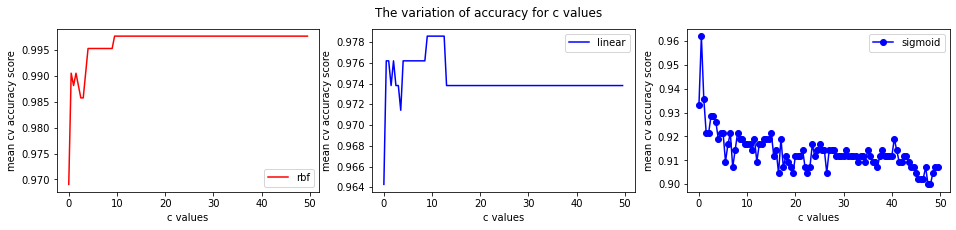

In [141]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for c values')
c_lst=np.arange(0.01,50,.5)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('c values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()

In [142]:
np.max(result_c['rbf'])

0.9976190476190476

In [143]:
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for gam in np.arange(0.001,1,.001):
        ans=cross_validate(kern,5.6,gam)
        result_c[kern].append(ans)
        

[0.96428571 0.98809524 0.96428571 0.95238095 0.98809524]
[0.97619048 0.97619048 0.96428571 0.96428571 0.98809524]
[0.97619048 0.97619048 0.96428571 0.96428571 0.98809524]
[0.97619048 0.97619048 0.96428571 0.97619048 0.98809524]
[0.97619048 0.97619048 0.97619048 0.97619048 1.        ]
[0.97619048 0.97619048 0.97619048 0.97619048 0.98809524]
[0.97619048 0.97619048 0.97619048 0.97619048 0.98809524]
[0.98809524 0.97619048 0.97619048 0.96428571 0.98809524]
[0.98809524 0.97619048 0.97619048 0.96428571 0.98809524]
[0.98809524 0.96428571 0.98809524 0.96428571 0.98809524]
[0.98809524 0.97619048 0.97619048 0.96428571 0.98809524]
[0.98809524 0.97619048 0.97619048 0.96428571 0.98809524]
[0.98809524 0.96428571 0.98809524 0.96428571 0.98809524]
[0.98809524 0.96428571 0.98809524 0.98809524 0.98809524]
[0.98809524 0.96428571 0.98809524 0.98809524 0.98809524]
[0.98809524 0.96428571 0.98809524 0.98809524 0.98809524]
[0.98809524 0.96428571 0.98809524 0.98809524 0.98809524]
[0.98809524 0.96428571 0.988095

[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.         1.         0.98809524]
[1.         0.98809524 1.      

[1.         1.         1.         1.         0.98809524]
[1.         1.         1.         1.         0.98809524]
[1.         1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.         1.         0.98809524]
[0.98809524 1.         1.      

[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.97619048]
[0.98809524 1.         0.98809524 1.         0.96428571]
[0.98809524 1.         0.98809524 1.         0.96428571]
[0.97619048 1.         0.988095

[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 1.         0.95238095]
[0.96428571 0.96428571 0.96428571 0.98809524 0.95238095]
[0.96428571 0.96428571 0.96428571 0.98809524 0.95238095]
[0.96428571 0.96428571 0.96428571 0.98809524 0.94047619]
[0.96428571 0.96428571 0.964285

[0.95238095 0.95238095 0.95238095 0.98809524 0.94047619]
[0.95238095 0.95238095 0.95238095 0.98809524 0.94047619]
[0.95238095 0.95238095 0.95238095 0.98809524 0.94047619]
[0.95238095 0.95238095 0.95238095 0.98809524 0.94047619]
[0.95238095 0.95238095 0.95238095 0.98809524 0.94047619]
[0.95238095 0.95238095 0.95238095 0.98809524 0.94047619]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.95238095 0.98809524 0.92857143]
[0.95238095 0.95238095 0.952380

[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.94047619 0.96428571 0.92857143]
[0.94047619 0.95238095 0.940476

[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.952380

[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.952380

[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.952380

[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.952380

[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.952380

[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.952380

[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.95238095 0.97619048 0.98809524]
[0.98809524 0.97619048 0.952380

[0.95238095 0.98809524 0.95238095 0.94047619 0.94047619]
[0.94047619 0.98809524 0.92857143 0.94047619 0.94047619]
[0.96428571 0.97619048 0.94047619 0.92857143 0.95238095]
[0.95238095 0.98809524 0.92857143 0.94047619 0.94047619]
[0.94047619 0.97619048 0.94047619 0.92857143 0.95238095]
[0.95238095 0.97619048 0.94047619 0.94047619 0.94047619]
[0.95238095 0.97619048 0.94047619 0.95238095 0.94047619]
[0.94047619 0.97619048 0.95238095 0.96428571 0.94047619]
[0.94047619 0.96428571 0.95238095 0.95238095 0.94047619]
[0.92857143 0.96428571 0.94047619 0.96428571 0.92857143]
[0.91666667 0.98809524 0.94047619 0.96428571 0.92857143]
[0.91666667 0.97619048 0.94047619 0.96428571 0.94047619]
[0.92857143 0.97619048 0.94047619 0.95238095 0.94047619]
[0.91666667 0.97619048 0.92857143 0.95238095 0.95238095]
[0.92857143 0.97619048 0.92857143 0.95238095 0.95238095]
[0.91666667 0.97619048 0.94047619 0.95238095 0.95238095]
[0.91666667 0.97619048 0.94047619 0.95238095 0.95238095]
[0.92857143 0.97619048 0.940476

[0.85714286 0.89285714 0.8452381  0.77380952 0.77380952]
[0.85714286 0.89285714 0.8452381  0.77380952 0.77380952]
[0.85714286 0.89285714 0.8452381  0.76190476 0.77380952]
[0.86904762 0.88095238 0.83333333 0.75       0.77380952]
[0.86904762 0.8452381  0.83333333 0.75       0.77380952]
[0.86904762 0.83333333 0.8452381  0.75       0.77380952]
[0.8452381  0.86904762 0.85714286 0.75       0.77380952]
[0.8452381  0.88095238 0.8452381  0.75       0.82142857]
[0.86904762 0.86904762 0.8452381  0.75       0.77380952]
[0.86904762 0.88095238 0.83333333 0.75       0.77380952]
[0.86904762 0.85714286 0.83333333 0.75       0.77380952]
[0.8452381  0.85714286 0.83333333 0.75       0.83333333]
[0.85714286 0.83333333 0.83333333 0.75       0.77380952]
[0.85714286 0.83333333 0.83333333 0.75       0.77380952]
[0.85714286 0.83333333 0.82142857 0.75       0.77380952]
[0.86904762 0.83333333 0.82142857 0.73809524 0.77380952]
[0.86904762 0.8452381  0.82142857 0.72619048 0.77380952]
[0.86904762 0.83333333 0.809523

[0.82142857 0.76190476 0.73809524 0.66666667 0.76190476]
[0.82142857 0.73809524 0.77380952 0.66666667 0.75      ]
[0.82142857 0.73809524 0.73809524 0.66666667 0.75      ]
[0.82142857 0.73809524 0.73809524 0.67857143 0.75      ]
[0.82142857 0.72619048 0.73809524 0.67857143 0.75      ]
[0.82142857 0.75       0.73809524 0.67857143 0.75      ]
[0.82142857 0.75       0.73809524 0.66666667 0.78571429]
[0.82142857 0.75       0.73809524 0.66666667 0.77380952]
[0.82142857 0.75       0.73809524 0.66666667 0.75      ]
[0.82142857 0.75       0.76190476 0.66666667 0.75      ]
[0.82142857 0.76190476 0.76190476 0.67857143 0.76190476]
[0.82142857 0.76190476 0.76190476 0.67857143 0.75      ]
[0.82142857 0.76190476 0.76190476 0.67857143 0.73809524]
[0.82142857 0.75       0.76190476 0.67857143 0.73809524]
[0.82142857 0.75       0.76190476 0.66666667 0.73809524]
[0.82142857 0.75       0.76190476 0.66666667 0.73809524]
[0.82142857 0.71428571 0.76190476 0.6547619  0.73809524]
[0.82142857 0.72619048 0.761904

[0.80952381 0.72619048 0.72619048 0.63095238 0.72619048]
[0.80952381 0.72619048 0.72619048 0.63095238 0.72619048]
[0.78571429 0.72619048 0.72619048 0.63095238 0.72619048]
[0.78571429 0.72619048 0.72619048 0.63095238 0.72619048]
[0.78571429 0.72619048 0.72619048 0.63095238 0.72619048]
[0.78571429 0.72619048 0.72619048 0.63095238 0.72619048]
[0.80952381 0.72619048 0.72619048 0.63095238 0.72619048]
[0.80952381 0.72619048 0.72619048 0.63095238 0.72619048]
[0.80952381 0.72619048 0.72619048 0.63095238 0.72619048]
[0.80952381 0.72619048 0.72619048 0.63095238 0.72619048]
[0.80952381 0.72619048 0.72619048 0.63095238 0.72619048]
[0.80952381 0.72619048 0.72619048 0.63095238 0.72619048]
[0.80952381 0.69047619 0.72619048 0.63095238 0.72619048]
[0.80952381 0.69047619 0.72619048 0.63095238 0.72619048]
[0.80952381 0.69047619 0.72619048 0.63095238 0.72619048]
[0.80952381 0.69047619 0.72619048 0.61904762 0.72619048]
[0.80952381 0.69047619 0.72619048 0.61904762 0.72619048]
[0.80952381 0.69047619 0.726190

[0.80952381 0.71428571 0.71428571 0.5952381  0.72619048]
[0.80952381 0.71428571 0.71428571 0.5952381  0.72619048]
[0.80952381 0.71428571 0.71428571 0.5952381  0.72619048]
[0.80952381 0.71428571 0.71428571 0.61904762 0.72619048]
[0.80952381 0.71428571 0.71428571 0.61904762 0.72619048]
[0.80952381 0.71428571 0.71428571 0.60714286 0.72619048]
[0.80952381 0.71428571 0.71428571 0.60714286 0.72619048]
[0.80952381 0.71428571 0.71428571 0.60714286 0.72619048]
[0.80952381 0.71428571 0.70238095 0.61904762 0.72619048]
[0.80952381 0.71428571 0.70238095 0.61904762 0.72619048]
[0.80952381 0.66666667 0.70238095 0.61904762 0.72619048]
[0.80952381 0.66666667 0.69047619 0.61904762 0.72619048]
[0.77380952 0.66666667 0.69047619 0.61904762 0.72619048]
[0.77380952 0.66666667 0.69047619 0.61904762 0.72619048]
[0.77380952 0.66666667 0.69047619 0.61904762 0.72619048]
[0.80952381 0.70238095 0.69047619 0.61904762 0.72619048]
[0.78571429 0.70238095 0.69047619 0.61904762 0.72619048]
[0.78571429 0.70238095 0.690476

[0.78571429 0.66666667 0.69047619 0.63095238 0.75      ]
[0.78571429 0.66666667 0.66666667 0.63095238 0.75      ]
[0.79761905 0.66666667 0.66666667 0.63095238 0.70238095]
[0.79761905 0.6547619  0.66666667 0.63095238 0.70238095]
[0.79761905 0.66666667 0.66666667 0.63095238 0.70238095]
[0.79761905 0.6547619  0.66666667 0.61904762 0.70238095]
[0.79761905 0.66666667 0.66666667 0.60714286 0.70238095]
[0.79761905 0.6547619  0.66666667 0.60714286 0.70238095]
[0.79761905 0.6547619  0.66666667 0.60714286 0.75      ]
[0.79761905 0.6547619  0.66666667 0.60714286 0.75      ]
[0.78571429 0.6547619  0.66666667 0.63095238 0.75      ]
[0.78571429 0.6547619  0.66666667 0.63095238 0.75      ]
[0.78571429 0.6547619  0.66666667 0.63095238 0.75      ]
[0.78571429 0.6547619  0.66666667 0.63095238 0.75      ]
[0.78571429 0.6547619  0.66666667 0.61904762 0.75      ]
[0.78571429 0.66666667 0.66666667 0.61904762 0.70238095]
[0.78571429 0.66666667 0.66666667 0.61904762 0.70238095]
[0.77380952 0.6547619  0.666666

[0.79761905 0.6547619  0.70238095 0.61904762 0.75      ]
[0.79761905 0.6547619  0.67857143 0.61904762 0.75      ]
[0.79761905 0.6547619  0.67857143 0.61904762 0.75      ]
[0.79761905 0.6547619  0.67857143 0.61904762 0.75      ]
[0.79761905 0.6547619  0.67857143 0.61904762 0.75      ]
[0.79761905 0.6547619  0.67857143 0.61904762 0.75      ]
[0.79761905 0.6547619  0.67857143 0.61904762 0.71428571]
[0.79761905 0.6547619  0.67857143 0.61904762 0.71428571]
[0.79761905 0.6547619  0.67857143 0.61904762 0.71428571]
[0.79761905 0.6547619  0.67857143 0.61904762 0.71428571]
[0.79761905 0.6547619  0.67857143 0.61904762 0.71428571]
[0.79761905 0.6547619  0.67857143 0.61904762 0.71428571]
[0.79761905 0.6547619  0.69047619 0.61904762 0.71428571]
[0.79761905 0.6547619  0.69047619 0.61904762 0.71428571]
[0.79761905 0.6547619  0.69047619 0.58333333 0.71428571]
[0.79761905 0.6547619  0.69047619 0.58333333 0.71428571]
[0.79761905 0.6547619  0.67857143 0.58333333 0.71428571]
[0.79761905 0.6547619  0.678571

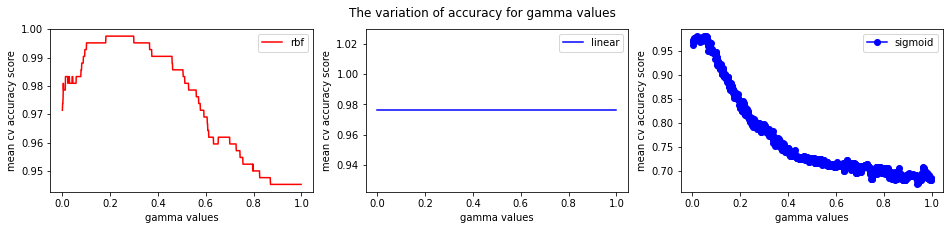

In [144]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for gamma values')
c_lst=np.arange(0.001,1,0.001)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('gamma values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()

## Checking for the classes 8 and 9 with full features

In [105]:
df,label=normal_data_prepare(8,9)
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)



In [152]:
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for c in np.arange(0.01,100,1):
        ans=cross_validate(kern,c,gam='scale')
        result_c[kern].append(ans)
        

[0.97619048 0.98809524 0.92857143 0.94047619 0.95238095]
[0.98809524 0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.         0.97619048 0.97619048]
[1.         0.97619048 1.      

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.94047619 0.94047619 0.95238095 0.94047619 0.94047619]


0.9857142857142858


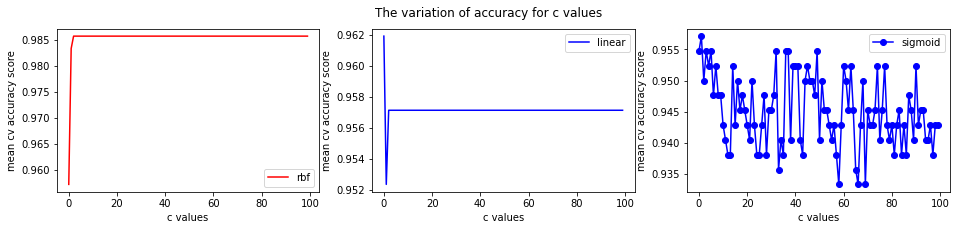

In [154]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for c values')
c_lst=np.arange(0.01,100,1)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('c values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()
print(np.max(result_c['rbf']))    

In [150]:
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for gam in np.arange(0.001,1,.001):
        ans=cross_validate(kern,5.6,gam)
        result_c[kern].append(ans)

[0.98809524 0.96428571 0.95238095 0.96428571 0.95238095]
[0.98809524 0.96428571 0.97619048 0.96428571 0.96428571]
[0.98809524 0.97619048 0.97619048 0.97619048 0.96428571]
[0.98809524 0.97619048 0.97619048 0.97619048 0.97619048]
[0.98809524 0.97619048 0.97619048 0.97619048 0.98809524]
[0.98809524 0.97619048 0.98809524 0.97619048 1.        ]
[0.98809524 0.97619048 0.98809524 0.97619048 1.        ]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.98809524 0.97619048 0.96428571]
[0.98809524 0.97619048 0.98809524 0.97619048 0.96428571]
[0.98809524 0.97619048 0.97619048 0.97619048 0.96428571]
[0.98809524 0.97619048 0.98809524 0.97619048 0.96428571]
[0.98809524 0.97619048 0.98809524 0.97619048 0.96428571]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.98809524 0.97619048 0.97619048]
[0.98809524 0.97619048 0.988095

[0.95238095 0.92857143 0.95238095 0.96428571 0.94047619]
[0.95238095 0.92857143 0.95238095 0.96428571 0.94047619]
[0.95238095 0.92857143 0.95238095 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.92857143 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.94047619 0.96428571 0.94047619]
[0.95238095 0.91666667 0.91666667 0.96428571 0.94047619]
[0.95238095 0.91666667 0.916666

[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.88095238]
[0.89285714 0.86904762 0.86904762 0.8452381  0.86904762]
[0.89285714 0.86904762 0.86904762 0.8452381  0.85714286]
[0.89285714 0.86904762 0.86904762 0.8452381  0.85714286]
[0.89285714 0.86904762 0.86904762 0.8452381  0.85714286]
[0.89285714 0.86904762 0.86904762 0.83333333 0.85714286]
[0.89285714 0.86904762 0.86904762 0.83333333 0.85714286]
[0.89285714 0.86904762 0.86904762 0.83333333 0.85714286]
[0.89285714 0.86904762 0.86904762 0.83333333 0.85714286]
[0.89285714 0.86904762 0.869047

[0.85714286 0.83333333 0.82142857 0.79761905 0.80952381]
[0.85714286 0.83333333 0.82142857 0.79761905 0.80952381]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.79761905 0.79761905]
[0.85714286 0.83333333 0.82142857 0.78571429 0.79761905]
[0.85714286 0.83333333 0.82142857 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.80952381 0.78571429 0.78571429]
[0.85714286 0.83333333 0.809523

[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.79761905 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.76190476 0.71428571 0.75      ]
[0.78571429 0.78571429 0.761904

[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.69047619]
[0.76190476 0.77380952 0.69047619 0.67857143 0.67857143]
[0.76190476 0.77380952 0.69047619 0.67857143 0.67857143]
[0.76190476 0.77380952 0.69047619 0.67857143 0.67857143]
[0.76190476 0.77380952 0.690476

[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.6547619  0.63095238 0.6547619 ]
[0.73809524 0.70238095 0.654761

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.92857143 0.97619048 0.95238095]
[0.96428571 0.96428571 0.928571

[0.94047619 0.92857143 0.9047619  0.92857143 0.95238095]
[0.94047619 0.92857143 0.89285714 0.94047619 0.97619048]
[0.94047619 0.91666667 0.88095238 0.91666667 0.96428571]
[0.97619048 0.95238095 0.89285714 0.89285714 0.94047619]
[0.94047619 0.95238095 0.89285714 0.92857143 0.97619048]
[0.94047619 0.91666667 0.88095238 0.89285714 0.97619048]
[0.94047619 0.9047619  0.89285714 0.88095238 0.94047619]
[0.92857143 0.92857143 0.86904762 0.88095238 0.94047619]
[0.92857143 0.91666667 0.89285714 0.88095238 0.92857143]
[0.91666667 0.88095238 0.89285714 0.89285714 0.91666667]
[0.91666667 0.9047619  0.86904762 0.89285714 0.94047619]
[0.91666667 0.92857143 0.88095238 0.89285714 0.92857143]
[0.9047619  0.89285714 0.88095238 0.89285714 0.92857143]
[0.91666667 0.89285714 0.88095238 0.9047619  0.94047619]
[0.92857143 0.89285714 0.88095238 0.9047619  0.92857143]
[0.92857143 0.89285714 0.89285714 0.88095238 0.94047619]
[0.91666667 0.86904762 0.86904762 0.9047619  0.94047619]
[0.9047619  0.9047619  0.880952

[0.79761905 0.82142857 0.75       0.8452381  0.82142857]
[0.80952381 0.79761905 0.75       0.8452381  0.8452381 ]
[0.79761905 0.79761905 0.76190476 0.83333333 0.82142857]
[0.78571429 0.79761905 0.76190476 0.83333333 0.82142857]
[0.79761905 0.82142857 0.75       0.83333333 0.82142857]
[0.79761905 0.82142857 0.76190476 0.83333333 0.82142857]
[0.79761905 0.80952381 0.73809524 0.83333333 0.8452381 ]
[0.83333333 0.80952381 0.73809524 0.83333333 0.8452381 ]
[0.83333333 0.80952381 0.73809524 0.79761905 0.83333333]
[0.83333333 0.80952381 0.72619048 0.78571429 0.83333333]
[0.83333333 0.80952381 0.71428571 0.82142857 0.83333333]
[0.78571429 0.80952381 0.71428571 0.82142857 0.83333333]
[0.79761905 0.80952381 0.71428571 0.80952381 0.83333333]
[0.79761905 0.79761905 0.75       0.79761905 0.82142857]
[0.78571429 0.79761905 0.73809524 0.78571429 0.83333333]
[0.78571429 0.79761905 0.73809524 0.82142857 0.82142857]
[0.78571429 0.79761905 0.73809524 0.82142857 0.82142857]
[0.78571429 0.79761905 0.714285

[0.75       0.78571429 0.70238095 0.78571429 0.85714286]
[0.75       0.78571429 0.70238095 0.76190476 0.83333333]
[0.75       0.78571429 0.70238095 0.76190476 0.85714286]
[0.75       0.78571429 0.70238095 0.76190476 0.83333333]
[0.75       0.78571429 0.70238095 0.76190476 0.83333333]
[0.75       0.78571429 0.70238095 0.76190476 0.83333333]
[0.75       0.78571429 0.70238095 0.76190476 0.83333333]
[0.75       0.78571429 0.70238095 0.76190476 0.83333333]
[0.75       0.78571429 0.70238095 0.76190476 0.83333333]
[0.75       0.78571429 0.69047619 0.76190476 0.83333333]
[0.75       0.78571429 0.70238095 0.76190476 0.83333333]
[0.75       0.78571429 0.71428571 0.76190476 0.85714286]
[0.75       0.78571429 0.71428571 0.76190476 0.85714286]
[0.75       0.78571429 0.71428571 0.76190476 0.8452381 ]
[0.75       0.78571429 0.71428571 0.76190476 0.8452381 ]
[0.75       0.78571429 0.70238095 0.76190476 0.8452381 ]
[0.75       0.79761905 0.70238095 0.75       0.8452381 ]
[0.77380952 0.79761905 0.702380

[0.72619048 0.77380952 0.69047619 0.76190476 0.80952381]
[0.72619048 0.77380952 0.69047619 0.76190476 0.80952381]
[0.72619048 0.77380952 0.66666667 0.76190476 0.82142857]
[0.72619048 0.77380952 0.66666667 0.76190476 0.82142857]
[0.72619048 0.77380952 0.66666667 0.76190476 0.83333333]
[0.72619048 0.76190476 0.66666667 0.76190476 0.83333333]
[0.72619048 0.76190476 0.69047619 0.76190476 0.83333333]
[0.72619048 0.76190476 0.69047619 0.76190476 0.8452381 ]
[0.75       0.76190476 0.69047619 0.76190476 0.8452381 ]
[0.72619048 0.76190476 0.69047619 0.76190476 0.8452381 ]
[0.72619048 0.76190476 0.67857143 0.76190476 0.83333333]
[0.72619048 0.77380952 0.69047619 0.76190476 0.83333333]
[0.72619048 0.77380952 0.66666667 0.76190476 0.83333333]
[0.72619048 0.77380952 0.67857143 0.76190476 0.83333333]
[0.72619048 0.77380952 0.66666667 0.76190476 0.83333333]
[0.72619048 0.77380952 0.66666667 0.76190476 0.8452381 ]
[0.72619048 0.77380952 0.66666667 0.76190476 0.8452381 ]
[0.72619048 0.77380952 0.666666

[0.72619048 0.77380952 0.6547619  0.75       0.80952381]
[0.72619048 0.77380952 0.70238095 0.75       0.80952381]
[0.72619048 0.77380952 0.70238095 0.75       0.80952381]
[0.75       0.77380952 0.70238095 0.77380952 0.80952381]
[0.73809524 0.77380952 0.70238095 0.77380952 0.80952381]
[0.73809524 0.76190476 0.70238095 0.75       0.80952381]
[0.73809524 0.77380952 0.70238095 0.76190476 0.83333333]
[0.75       0.79761905 0.70238095 0.75       0.80952381]
[0.75       0.78571429 0.70238095 0.76190476 0.80952381]
[0.72619048 0.78571429 0.67857143 0.77380952 0.83333333]
[0.75       0.75       0.67857143 0.77380952 0.83333333]
[0.73809524 0.75       0.67857143 0.77380952 0.80952381]
[0.76190476 0.75       0.67857143 0.76190476 0.80952381]
[0.76190476 0.75       0.66666667 0.76190476 0.80952381]
[0.76190476 0.75       0.66666667 0.76190476 0.80952381]
[0.75       0.79761905 0.66666667 0.76190476 0.80952381]
[0.75       0.75       0.66666667 0.77380952 0.80952381]
[0.75       0.75       0.666666

[0.76190476 0.79761905 0.66666667 0.75       0.82142857]
[0.72619048 0.79761905 0.69047619 0.75       0.78571429]
[0.76190476 0.79761905 0.69047619 0.75       0.78571429]
[0.76190476 0.79761905 0.69047619 0.75       0.78571429]
[0.76190476 0.78571429 0.69047619 0.75       0.78571429]
[0.76190476 0.78571429 0.69047619 0.75       0.80952381]
[0.76190476 0.78571429 0.69047619 0.75       0.80952381]
[0.76190476 0.78571429 0.67857143 0.76190476 0.80952381]
[0.76190476 0.78571429 0.6547619  0.76190476 0.80952381]
[0.76190476 0.78571429 0.6547619  0.76190476 0.80952381]
[0.76190476 0.78571429 0.67857143 0.76190476 0.80952381]
[0.76190476 0.78571429 0.67857143 0.76190476 0.80952381]
[0.71428571 0.79761905 0.66666667 0.76190476 0.80952381]
[0.76190476 0.79761905 0.66666667 0.76190476 0.80952381]
[0.76190476 0.78571429 0.66666667 0.72619048 0.80952381]
[0.76190476 0.75       0.6547619  0.72619048 0.80952381]
[0.76190476 0.77380952 0.6547619  0.73809524 0.80952381]
[0.76190476 0.77380952 0.654761

[0.76190476 0.78571429 0.66666667 0.73809524 0.79761905]
[0.76190476 0.78571429 0.66666667 0.72619048 0.79761905]
[0.75       0.78571429 0.66666667 0.75       0.79761905]
[0.76190476 0.75       0.6547619  0.72619048 0.79761905]
[0.76190476 0.79761905 0.6547619  0.72619048 0.79761905]
[0.76190476 0.79761905 0.6547619  0.72619048 0.79761905]
[0.75       0.79761905 0.6547619  0.72619048 0.79761905]
[0.75       0.79761905 0.6547619  0.72619048 0.78571429]
[0.75       0.79761905 0.6547619  0.72619048 0.78571429]
[0.75       0.79761905 0.6547619  0.75       0.80952381]
[0.79761905 0.79761905 0.6547619  0.75       0.80952381]
[0.79761905 0.79761905 0.67857143 0.75       0.80952381]
[0.72619048 0.79761905 0.67857143 0.75       0.80952381]
[0.72619048 0.79761905 0.67857143 0.75       0.80952381]
[0.72619048 0.79761905 0.6547619  0.75       0.80952381]
[0.72619048 0.78571429 0.67857143 0.75       0.80952381]
[0.72619048 0.78571429 0.67857143 0.73809524 0.80952381]
[0.75       0.78571429 0.678571

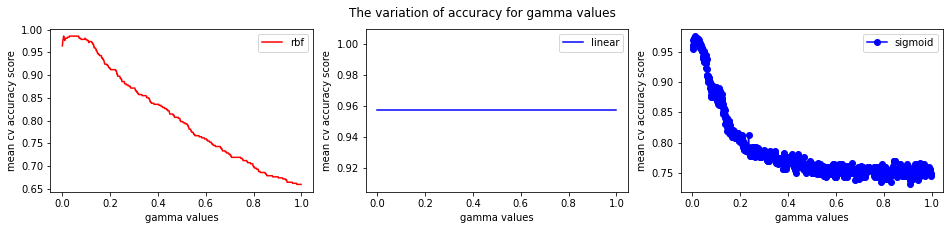

In [151]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for gamma values')
c_lst=np.arange(0.001,1,0.001)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('gamma values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()

In [85]:
model,scores,y_pred=data_modelling(1,2,3,'linear')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [106]:
#Cross validation
import random
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,11,12,10,20,30,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
parameters = [ {'C':[.1,0.01,10,20,30,40], 'kernel':['rbf','linear','poly'], 'degree': [2,3,4] ,'gamma':[10*random.random() for num in range(5)]} ]
grid = GridSearchCV(SVC(),param_grid,refit=parameters,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(grid_predictions)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
best_params['p89_full']=grid.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] C=12, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=12, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=12, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=12, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=12, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=12, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=12, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=12, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=12, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=12, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=12, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=12, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=12, gamma=0.1, kernel=linear ..................................
[CV] ................... C=12, gamma=0.1, kernel=linear, total=   0.0s
[CV] C

[CV] ..................... C=20, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=20, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=20, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=20, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=20, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=20, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=20, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.01, kernel=linear .................................
[CV] .................. C=20, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=20, gamma=0.01, kernel=linear .................................
[CV] .................. C=20, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=20, gamma=0.01, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    1.2s finished


# checking for the classes 5 and 6

In [114]:
df,label=data_prepare(4,8)
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)# stratify to avoid class imbalancing

In [115]:
import random
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,11,12,10,20,30,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
parameters = [ {'C':[.1,0.01,10,20,30,40], 'kernel':['rbf','linear','poly'], 'degree': [2,3,4] ,'gamma':[10*random.random() for num in range(5)]} ]
grid = GridSearchCV(SVC(),param_grid,refit=parameters,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(grid_predictions)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
best_params['p48']=grid.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C

[CV] ................. C=12, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .

[CV] .................. C=20, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=20, gamma=0.01, kernel=linear .................................
[CV] .................. C=20, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=20, gamma=0.01, kernel=linear .................................
[CV] .................. C=20, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=20, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=20, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=20, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=20, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=20, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=20, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=20, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=20, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.001, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    1.0s finished


## with full dataset this time

In [116]:
df,label=normal_data_prepare(4,8)
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)


In [53]:
y_train.shape

(420,)

In [117]:
import random
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,11,12,10,20,30,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
#parameters = [ {'C':[.1,0.01,10,20,30,40], 'kernel':['rbf','linear','poly'], 'degree': [2,3,4] ,'gamma':[10*random.random() for num in range(5)]} ]
grid = GridSearchCV(SVC(),param_grid,refit=parameters,verbose=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(grid_predictions)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
best_params['p48_full']=grid.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] C=11, gamma=0.01, kernel=linear .................................
[CV] .................. C=11, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=11, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=11, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=11, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=11, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=11, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=11, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=11, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=11, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=11, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=11, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=11, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=11, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C

[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=20, gamma=1, kernel=rbf .......................................
[CV] ........................ C=20, gamma=1, kernel=rbf, total=   0.0s
[CV] C=20, gamma=1, kernel=rbf .......................................
[CV] ........................ C=20, gamma=1, kernel=rbf, total=   0.0s
[CV] C=20, gamma=1, kernel=rbf .......................................
[CV] ........................ C=20, gamma=1, kernel=rbf, total=   0.0s
[CV] C=20, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=20, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=20, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=20, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=1, kernel=linear ....................................
[CV] .

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    1.5s finished


[]

# Question to be answered here:  _Does the accuracy/other metrics vary based on the type of classes while choosing same hyper-parameters for both 10 and 25 features dataset?_


In [ ]:
# let's check the performance for the same hyperparameters.
# first with 10 features hyper on full
# next with 25 features on full

In [118]:
dict(best_params)

{'p27': {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
 'p27_full': {'C': 12, 'gamma': 0.01, 'kernel': 'sigmoid'},
 'p89': {'C': 11, 'gamma': 0.1, 'kernel': 'rbf'},
 'p89_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'},
 'p56': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 'p56_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'},
 'p48': {'C': 1, 'gamma': 1, 'kernel': 'linear'},
 'p48_full': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}}

In [113]:
dict(best_params)

{'p27': {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
 'p27_full': {'C': 12, 'gamma': 0.01, 'kernel': 'sigmoid'},
 'p89': {'C': 11, 'gamma': 0.1, 'kernel': 'rbf'},
 'p89_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'},
 'p56': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 'p56_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'}}

## part 3 of second question 
# multiclass with 10 vs 25 features, cross validation to choose hyperparametes

In [120]:
df_data.shape

(3000, 26)

In [156]:
df=df_data.iloc[:,:25]
label=df_data['label']
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)# stratify to avoid class imbalancing

In [157]:
X_train.shape

(2100, 25)

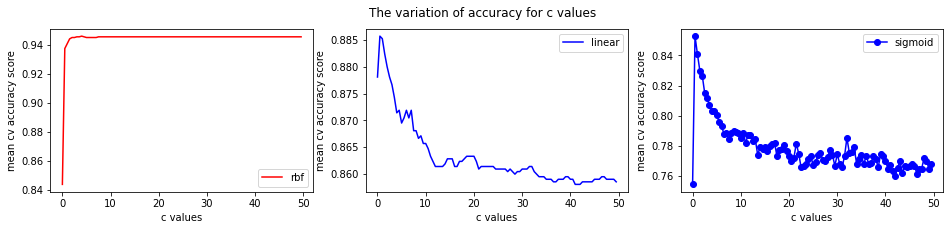

In [138]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for c values')
c_lst=np.arange(0.01,50,.5)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('c values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()

In [146]:

import random
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,11,12,10,20,30,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
#parameters = [ {'C':[.1,0.01,10,20,30,40], 'kernel':['rbf','linear','poly'], 'degree': [2,3,4] ,'gamma':[10*random.random() for num in range(5)]} ]
grid = GridSearchCV(SVC(),param_grid,refit=parameters,verbose=2,n_jobs=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(grid_predictions)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
best_params['multi_full']=grid.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 128 tasks      | elapsed:    5.2s


[8 1 9 2 8 8 1 0 4 4 7 8 1 5 4 0 8 4 0 6 9 3 7 5 5 2 3 1 3 8 1 1 3 4 9 9 4
 2 7 1 7 3 0 8 3 4 7 9 6 2 1 3 1 3 5 3 8 9 8 8 3 8 1 9 7 7 0 9 9 8 2 7 7 3
 8 2 5 7 2 7 2 0 3 8 0 8 6 9 8 0 4 6 0 5 8 8 7 3 0 8 9 2 9 7 6 0 3 2 1 7 0
 0 4 2 3 1 8 0 0 9 9 8 5 0 5 2 0 7 6 9 4 0 1 2 5 8 9 2 3 6 1 4 5 5 7 3 2 3
 9 1 5 0 7 0 7 7 0 4 2 2 1 0 0 0 8 3 8 5 0 6 6 4 5 7 3 4 2 4 8 1 3 6 3 4 5
 3 4 3 3 4 0 1 7 4 1 4 1 5 4 5 5 2 4 9 9 8 8 5 0 2 5 2 3 5 7 6 7 3 6 9 6 8
 3 6 0 4 3 8 8 9 8 5 2 7 7 6 6 4 6 1 6 6 8 6 7 9 6 7 4 8 6 2 5 8 3 3 1 4 4
 2 4 1 9 4 6 3 7 5 5 8 2 1 9 1 9 0 1 1 4 6 3 4 9 6 4 2 4 8 1 9 0 5 0 2 6 6
 2 8 9 1 4 9 9 1 2 5 9 3 3 0 5 4 2 7 2 4 0 0 3 3 1 7 9 6 4 5 2 5 5 3 2 6 4
 8 6 2 6 9 8 5 1 2 3 1 4 7 0 5 4 0 8 5 0 6 4 4 1 2 5 2 4 2 2 6 7 4 0 3 9 6
 4 2 0 5 1 1 1 9 6 0 0 7 7 8 6 8 9 9 6 1 6 7 0 3 8 2 6 7 5 7 9 1 0 2 0 1 8
 6 7 9 3 1 4 1 6 9 2 8 2 5 4 9 1 4 3 3 4 6 6 4 5 4 6 9 3 1 6 1 3 7 8 6 5 6
 6 3 1 7 7 4 9 3 7 3 9 6 5 0 7 9 1 1 6 1 0 8 7 0 8 8 4 1 0 0 7 9 1 0 5 2 2
 0 1 7 5 8 7 1 2 5 7 0 9 

[Parallel(n_jobs=2)]: Done 288 out of 288 | elapsed:   14.5s finished


In [158]:
best_params

defaultdict(<function __main__.<lambda>()>,
            {'p27': {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
             'p27_full': {'C': 12, 'gamma': 0.01, 'kernel': 'sigmoid'},
             'p89': {'C': 11, 'gamma': 0.1, 'kernel': 'rbf'},
             'p89_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'},
             'p56': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
             'p56_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'},
             'p48': {'C': 1, 'gamma': 1, 'kernel': 'linear'},
             'p48_full': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
             'multi_full': {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
             'multi_full_10features': {'C': 10,
              'gamma': 0.1,
              'kernel': 'rbf'}})

In [159]:

 
# Train the model; We will train different models using different value of C
svm = SVC(kernel= 'rbf', random_state=1, C=10,gamma=.1)
svm.fit(X_train, y_train)
 
# Measure accuracy score
y_pred = svm.predict(X_test)
#('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('Training set score: {:.4f}'.format(svm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm.score(X_test, y_test)))
#The smaller the value of C, the wider the margins – which may lead to more misclassifications.
##Inversely, the larger the value of C, the more narrow the margins of the classifier become – this may lead to fewer misclassifications
# but higher values of c leads to overfitting
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training set score: 1.0000
Test set score: 0.9567
[[89  0  1  0  0  0  0  0  0  0]
 [ 0 88  1  0  0  1  0  0  0  0]
 [ 0  0 87  0  1  0  0  0  1  1]
 [ 0  0  6 80  0  2  0  1  1  0]
 [ 0  1  0  0 86  0  1  0  0  2]
 [ 0  0  0  3  0 87  0  0  0  0]
 [ 1  0  0  0  0  1 88  0  0  0]
 [ 1  0  1  0  2  0  0 83  0  3]
 [ 0  1  1  0  0  1  0  0 87  0]
 [ 0  0  0  0  2  1  0  1  0 86]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.98      0.98        90
           2       0.90      0.97      0.93        90
           3       0.96      0.89      0.92        90
           4       0.95      0.96      0.95        90
           5       0.94      0.97      0.95        90
           6       0.99      0.98      0.98        90
           7       0.98      0.92      0.95        90
           8       0.98      0.97      0.97        90
           9       0.93      0.96      0.95        90

    accuracy           

## Trying with first 10 features

In [147]:
best_params

defaultdict(<function __main__.<lambda>()>,
            {'p27': {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
             'p27_full': {'C': 12, 'gamma': 0.01, 'kernel': 'sigmoid'},
             'p89': {'C': 11, 'gamma': 0.1, 'kernel': 'rbf'},
             'p89_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'},
             'p56': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
             'p56_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'},
             'p48': {'C': 1, 'gamma': 1, 'kernel': 'linear'},
             'p48_full': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
             'multi_full': {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}})

In [141]:
df_data2=df_data.iloc[:,:10]
df_data2['label']=df_data['label']

#df=df_data2[(df_data['label']==1)|(df_data['label']==9)]
label=df_data2['label']
df=df_data2.drop('label',axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=1, stratify = label)# stratify to avoid class imbalanc

In [142]:
X_train.shape

(2100, 10)

In [150]:
kernerls_lst=['rbf','linear','sigmoid']
result_c=defaultdict(lambda:[])
for kern in kernerls_lst:
    
    for c in np.arange(0.01,100,1):
        ans=cross_validate(kern,c,gam='scale')
        result_c[kern].append(ans)
        

[0.77619048 0.78571429 0.80952381 0.79761905 0.75714286]
[0.88571429 0.88809524 0.9        0.89761905 0.89047619]
[0.89761905 0.88809524 0.9047619  0.90714286 0.9047619 ]
[0.89285714 0.9        0.90238095 0.9047619  0.90952381]
[0.8952381  0.89285714 0.89761905 0.90952381 0.9047619 ]
[0.89761905 0.89285714 0.8952381  0.90714286 0.90714286]
[0.89761905 0.8952381  0.9        0.90238095 0.9047619 ]
[0.89761905 0.89047619 0.9        0.9047619  0.91190476]
[0.9        0.89285714 0.89761905 0.90238095 0.90714286]
[0.89761905 0.89285714 0.8952381  0.90238095 0.90714286]
[0.9        0.8952381  0.89047619 0.9047619  0.90714286]
[0.9047619  0.89285714 0.88571429 0.89761905 0.90714286]
[0.90714286 0.89285714 0.88333333 0.89761905 0.9047619 ]
[0.90238095 0.88809524 0.88095238 0.89761905 0.9       ]
[0.89761905 0.88571429 0.88095238 0.89761905 0.9       ]
[0.89761905 0.88571429 0.88095238 0.89761905 0.90238095]
[0.89761905 0.88571429 0.88095238 0.9        0.9       ]
[0.89761905 0.88571429 0.880952

[0.7952381  0.80952381 0.82142857 0.84047619 0.8452381 ]
[0.7952381  0.80952381 0.82142857 0.84047619 0.8452381 ]
[0.7952381  0.80714286 0.82142857 0.84047619 0.8452381 ]
[0.7952381  0.80714286 0.82142857 0.84047619 0.84285714]
[0.7952381  0.80714286 0.82142857 0.84047619 0.84285714]
[0.7952381  0.80714286 0.82142857 0.84047619 0.84285714]
[0.7952381  0.80714286 0.82142857 0.84047619 0.84285714]
[0.7952381  0.80714286 0.82142857 0.84047619 0.84285714]
[0.7952381  0.80714286 0.81904762 0.84047619 0.84285714]
[0.79761905 0.8047619  0.81904762 0.84047619 0.84285714]
[0.7952381  0.8047619  0.81904762 0.84047619 0.84285714]
[0.7952381  0.8047619  0.81904762 0.84047619 0.84285714]
[0.79761905 0.8047619  0.81904762 0.84047619 0.84285714]
[0.79761905 0.8047619  0.81904762 0.84047619 0.84285714]
[0.79761905 0.8047619  0.81904762 0.84047619 0.84285714]
[0.79761905 0.8047619  0.81904762 0.84047619 0.84285714]
[0.79761905 0.8047619  0.81904762 0.84285714 0.84285714]
[0.79761905 0.8047619  0.819047

[0.60238095 0.63095238 0.6047619  0.63095238 0.6547619 ]
[0.5952381  0.63095238 0.61428571 0.62142857 0.66190476]
[0.6047619  0.63095238 0.61428571 0.61904762 0.67142857]
[0.59761905 0.61904762 0.60952381 0.61428571 0.66190476]
[0.60714286 0.62619048 0.61428571 0.60952381 0.67142857]
[0.60238095 0.61904762 0.61428571 0.60714286 0.65      ]
[0.6047619  0.62619048 0.62142857 0.60714286 0.6547619 ]
[0.60714286 0.62857143 0.6047619  0.60952381 0.65      ]
[0.5952381  0.63333333 0.60714286 0.6047619  0.6547619 ]
[0.59047619 0.63809524 0.5952381  0.60952381 0.65714286]
[0.6047619  0.61904762 0.61190476 0.61428571 0.66190476]


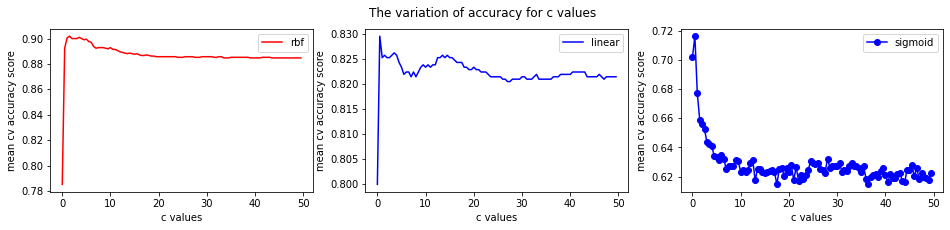

In [151]:
fig,axes=plt.subplots(1,3,figsize=(16,3))
fig.suptitle('The variation of accuracy for c values')
c_lst=np.arange(0.01,50,.5)
marker=['-r','-b','-bo']

for index,key in enumerate(result_c):
    axes[index].plot(c_lst,result_c[key],marker[index],label=key)
    axes[index].set_xlabel('c values')
    axes[index].set_ylabel('mean cv accuracy score')
    axes[index].legend()

In [152]:

import random
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,11,12,10,20,30,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
#parameters = [ {'C':[.1,0.01,10,20,30,40], 'kernel':['rbf','linear','poly'], 'degree': [2,3,4] ,'gamma':[10*random.random() for num in range(5)]} ]
grid = GridSearchCV(SVC(),param_grid,refit=parameters,verbose=2,n_jobs=2)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(grid_predictions)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
best_params['multi_full_10features']=grid.best_params_ 

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  44 tasks      | elapsed:    4.9s
[Parallel(n_jobs=2)]: Done 285 out of 288 | elapsed:   17.1s remaining:    0.1s


[8 1 9 2 8 8 1 0 4 4 7 8 1 5 4 0 8 4 0 6 9 3 7 5 5 2 3 1 3 8 1 1 3 4 9 9 4
 2 7 1 7 3 0 8 3 4 7 9 6 2 1 3 1 3 5 3 8 9 8 8 3 8 1 9 7 7 0 9 9 8 2 7 7 3
 8 2 5 7 2 7 2 0 3 8 0 8 6 9 8 0 4 6 0 5 8 8 7 3 0 8 9 2 9 7 6 0 3 2 1 7 0
 0 4 2 3 1 8 0 0 9 9 8 5 0 5 2 0 7 6 9 4 0 1 2 5 8 9 2 3 6 1 4 5 5 7 3 2 3
 9 1 5 0 7 0 7 7 0 4 2 2 1 0 0 0 8 3 8 5 0 6 6 4 5 7 3 4 2 4 8 1 3 6 3 4 5
 3 4 3 3 4 0 1 7 4 1 4 1 5 4 5 5 2 4 9 9 8 8 5 0 2 5 2 3 5 7 6 7 3 6 9 6 8
 3 6 0 4 3 8 8 9 8 5 2 7 7 6 6 4 6 1 6 6 8 6 7 9 6 7 4 8 6 2 5 8 3 3 1 4 4
 2 4 1 9 4 6 3 7 5 5 8 2 1 9 1 9 0 1 1 4 6 3 4 9 6 4 2 4 8 1 9 0 5 0 2 6 6
 2 8 9 1 4 9 9 1 2 5 9 3 3 0 5 4 2 7 2 4 0 0 3 3 1 7 9 6 4 5 2 5 5 3 2 6 4
 8 6 2 6 9 8 5 1 2 3 1 4 7 0 5 4 0 8 5 0 6 4 4 1 2 5 2 4 2 2 6 7 4 0 3 9 6
 4 2 0 5 1 1 1 9 6 0 0 7 7 8 6 8 9 9 6 1 6 7 0 3 8 2 6 7 5 7 9 1 0 2 0 1 8
 6 7 9 3 1 4 1 6 9 2 8 2 5 4 9 1 4 3 3 4 6 6 4 5 4 6 9 3 1 6 1 3 7 8 6 5 6
 6 3 1 7 7 4 9 3 7 3 9 6 5 0 7 9 1 1 6 1 0 8 7 0 8 8 4 1 0 0 7 9 1 0 5 2 2
 0 1 7 5 8 7 1 2 5 7 0 9 

[Parallel(n_jobs=2)]: Done 288 out of 288 | elapsed:   17.5s finished


In [153]:
best_params

defaultdict(<function __main__.<lambda>()>,
            {'p27': {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
             'p27_full': {'C': 12, 'gamma': 0.01, 'kernel': 'sigmoid'},
             'p89': {'C': 11, 'gamma': 0.1, 'kernel': 'rbf'},
             'p89_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'},
             'p56': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
             'p56_full': {'C': 11, 'gamma': 0.01, 'kernel': 'rbf'},
             'p48': {'C': 1, 'gamma': 1, 'kernel': 'linear'},
             'p48_full': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
             'multi_full': {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
             'multi_full_10features': {'C': 10,
              'gamma': 0.1,
              'kernel': 'rbf'}})

In [155]:

 
# Train the model; We will train different models using different value of C
svm = SVC(kernel= 'rbf', random_state=1, C=10,gamma=.1)
svm.fit(X_train, y_train)
 
# Measure accuracy score
y_pred = svm.predict(X_test)
#('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('Training set score: {:.4f}'.format(svm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm.score(X_test, y_test)))
#The smaller the value of C, the wider the margins – which may lead to more misclassifications.
##Inversely, the larger the value of C, the more narrow the margins of the classifier become – this may lead to fewer misclassifications
# but higher values of c leads to overfitting
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training set score: 0.9895
Test set score: 0.8989
[[88  0  0  0  0  2  0  0  0  0]
 [ 0 88  1  0  0  1  0  0  0  0]
 [ 0  0 84  1  1  0  1  1  2  0]
 [ 1  0  8 70  1  1  0  1  8  0]
 [ 0  0  0  0 79  0  2  0  0  9]
 [ 1  0  0  5  1 77  4  1  1  0]
 [ 0  0  1  0  0  1 88  0  0  0]
 [ 1  1  1  0  0  2  0 82  1  2]
 [ 0  2  2  6  2  2  0  0 75  1]
 [ 0  1  0  1  9  0  0  1  0 78]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.98      0.97        90
           2       0.87      0.93      0.90        90
           3       0.84      0.78      0.81        90
           4       0.85      0.88      0.86        90
           5       0.90      0.86      0.88        90
           6       0.93      0.98      0.95        90
           7       0.95      0.91      0.93        90
           8       0.86      0.83      0.85        90
           9       0.87      0.87      0.87        90

    accuracy           